In [81]:
import pandas as pd
import numpy as np
import seaborn as sns


In [82]:
df = pd.read_csv('planett.csv')


In [83]:
print(df.dtypes)

print(df.describe())
df.P_DETECTION


P_NAME                    object
P_STATUS                 float64
P_MASS                   float64
P_MASS_ERROR_MIN         float64
P_MASS_ERROR_MAX         float64
                          ...   
S_CONSTELLATION_ABR       object
S_CONSTELLATION_ENG       object
P_RADIUS_EST             float64
P_MASS_EST               float64
P_SEMI_MAJOR_AXIS_EST    float64
Length: 112, dtype: object
       P_STATUS        P_MASS  P_MASS_ERROR_MIN  P_MASS_ERROR_MAX  \
count    4048.0   1598.000000       1467.000000       1467.000000   
mean        3.0    798.384920       -152.292232        190.289692   
std         0.0   1406.808654        783.366353       1082.061976   
min         3.0      0.019070     -24965.390000          0.000000   
25%         3.0     26.548968        -79.457001          4.449592   
50%         3.0    273.332080        -24.154928         25.108412   
75%         3.0    806.488560         -4.392383         85.813561   
max         3.0  17668.059000          0.270000      26630

0       Radial Velocity
1       Radial Velocity
2       Radial Velocity
3       Radial Velocity
4       Radial Velocity
             ...       
4043            Transit
4044            Transit
4045    Radial Velocity
4046    Radial Velocity
4047    Radial Velocity
Name: P_DETECTION, Length: 4048, dtype: object

In [84]:
for column in df.columns:
   if df[column].dtype.name == 'float64' or df[column].dtype.name == 'int64':
        if df[column].std() > 1:
            print('The dataset requires normalization for the column', column)


The dataset requires normalization for the column P_MASS
The dataset requires normalization for the column P_MASS_ERROR_MIN
The dataset requires normalization for the column P_MASS_ERROR_MAX
The dataset requires normalization for the column P_RADIUS
The dataset requires normalization for the column P_RADIUS_ERROR_MIN
The dataset requires normalization for the column P_RADIUS_ERROR_MAX
The dataset requires normalization for the column P_YEAR
The dataset requires normalization for the column P_PERIOD
The dataset requires normalization for the column P_PERIOD_ERROR_MIN
The dataset requires normalization for the column P_PERIOD_ERROR_MAX
The dataset requires normalization for the column P_SEMI_MAJOR_AXIS
The dataset requires normalization for the column P_SEMI_MAJOR_AXIS_ERROR_MIN
The dataset requires normalization for the column P_SEMI_MAJOR_AXIS_ERROR_MAX
The dataset requires normalization for the column P_INCLINATION
The dataset requires normalization for the column P_INCLINATION_ERROR_

In [85]:

df.columns


Index(['P_NAME', 'P_STATUS', 'P_MASS', 'P_MASS_ERROR_MIN', 'P_MASS_ERROR_MAX',
       'P_RADIUS', 'P_RADIUS_ERROR_MIN', 'P_RADIUS_ERROR_MAX', 'P_YEAR',
       'P_UPDATED',
       ...
       'P_HABZONE_CON', 'P_TYPE_TEMP', 'P_HABITABLE', 'P_ESI',
       'S_CONSTELLATION', 'S_CONSTELLATION_ABR', 'S_CONSTELLATION_ENG',
       'P_RADIUS_EST', 'P_MASS_EST', 'P_SEMI_MAJOR_AXIS_EST'],
      dtype='object', length=112)

In [86]:
#value_mapping = {'Radial Velocity': 1, 'Imaging': 2, 'Transit': 3}Eclipse Timing Variations
#df['P_DETECTION'] = df['P_DETECTION'].map(value_mapping)
df.loc[df['P_DETECTION']=='Radial Velocity','P_DETECTION']=0
df.loc[df['P_DETECTION']=='Imaging','P_DETECTION']=1
df.loc[df['P_DETECTION']=='Transit','P_DETECTION']=2
df.loc[df['P_DETECTION']=='Eclipse Timing Variations','P_DETECTION']=3
df.loc[df['P_DETECTION']=='Microlensing','P_DETECTION']=4
df.loc[df['P_DETECTION']=='Orbital Brightness Modulation ','P_DETECTION']=5
df.loc[df['P_DETECTION']=='Pulsar Timing ','P_DETECTION']=6
df.loc[df['P_DETECTION']=='Pulsation Timing Variations ','P_DETECTION']=7
df.loc[df['P_DETECTION']=='Astrometry  ','P_DETECTION']=8


C:\Users\Laukik\AppData\Local\Temp\ipykernel_18032\3423471606.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df[['P_DETECTION', 'P_YEAR']].corr(), annot=False)


<Axes: >

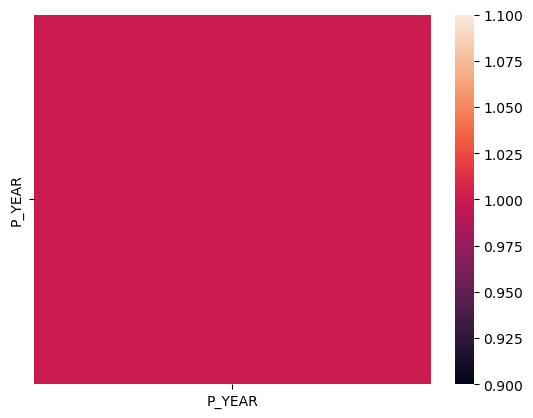

In [87]:

sns.heatmap(df[['P_DETECTION', 'P_YEAR']].corr(), annot=False)
#plt.show()

In [88]:
df.loc[df['P_DETECTION']== 0,'P_DETECTION']='Radial Velocity'
df.loc[df['P_DETECTION']== 1,'P_DETECTION']='Imaging'
df.loc[df['P_DETECTION']== 2,'P_DETECTION']='Transit'
df.loc[df['P_DETECTION']== 3,'P_DETECTION']='Eclipse Timing Variations'
df.loc[df['P_DETECTION']== 4,'P_DETECTION']='Microlensing'
df.loc[df['P_DETECTION']== 5,'P_DETECTION']='Orbital Brightness Modulation '
df.loc[df['P_DETECTION']== 6,'P_DETECTION']='Pulsar Timing '
df.loc[df['P_DETECTION']== 7,'P_DETECTION']='Pulsation Timing Variations '
df.loc[df['P_DETECTION']== 8,'P_DETECTION']='Astrometry'


In [89]:
for P_HABITABLE in [0, 1, 2]:
    print('The most used planetary detection methods for habitability class', P_HABITABLE, 'are:')
    print(df[df['P_HABITABLE'] == P_HABITABLE]['P_DETECTION'].value_counts().head(5))

The most used planetary detection methods for habitability class 0 are:
Transit                      3076
Radial Velocity               748
Microlensing                   78
Imaging                        47
Transit Timing Variations      18
Name: P_DETECTION, dtype: int64
The most used planetary detection methods for habitability class 1 are:
Radial Velocity    12
Transit             9
Name: P_DETECTION, dtype: int64
The most used planetary detection methods for habitability class 2 are:
Transit            29
Radial Velocity     5
Name: P_DETECTION, dtype: int64


In [103]:
descr=df.describe()
seventyfive =descr.loc['75%', 'P_RADIUS']

In [104]:
Twentyfive=descr.loc['25%', 'P_RADIUS']


In [105]:
IQR = seventyfive-Twentyfive

In [106]:
print(IQR)

1.9841700000000002


In [108]:
df.P_RADIUS.skew()

2.957998005969804